her bir bilet için BUSINESS, LEISURE, SECOND HOME ve STUDENT yolculuk nedenlerini tahmin etmek
Oluşan sonuçların kullanım senaryolarına ilişkin açıklama yapmanız beklenmektedir. 

# roadmap

1. data preprocessing
    1.1 preprocessing and eda
        eda for numerical values
    1.2 visualization
    
    drop null labels
    drop nulls
    drop outliers
2. feature engineering
    2.1 creating new features
    2.2 dropping useless features
3. imputation or no imputation
    3.1 mean imputation
    3.2 median imputation
    3.3 dropping nulls
4. sampling strategies
    4.1 undersampling
    4.2 resampling
    4.3 oversampling with smote
5. classifiers 
6. tuning

eda for numerical values
distribution for all variables
is there any outlier
any duplicate

eda- histograms- visualizations - boxplots 
look at feature importance and remove the unimportants


classification
class weights
different classifiers
tuning

https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html
https://shap.readthedocs.io/en/latest/index.html

https://docs.rapids.ai/api/cudf/stable/        
https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets?scriptVersionId=49328159&cellId=14

https://towardsdatascience.com/wisdom-of-the-crowd-voting-classifier-bagging-pasting-random-forest-and-extra-trees-289ef991e723

    

In [1]:
label =  ['FLIGHT_REASON']

categorical_str = [
'ARR',
'DEP',
'ID_PNR_ITI_CABCLASS_1',
'ID_PNR_ITI_CABCLASS_2',
'ID_PNR_ITI_SELCLASS_1',
'ID_PNR_ITI_SELCLASS_2',
'JRNY_TYP',
'NTNLT1' ] 

categorical_int = [
'arrival_interval_1',
'arrival_interval_2',
'flight_month_1',
'flight_month_2',
'flight_weekday_1',
'flight_weekday_2',
'pnr_create_month',
'pnr_create_weekday',
'pnr_workhour_interval']

numerical = [
'CUST_AGE',
'diff_pnr_firstflight', 
'diff_second_firstflight',
'flight_duration_1',
'flight_duration_2',
]

passthrough = [
'CHILD_FLG',
'FAMILY_FLG',
'INFANT_FLG',
'PET_FLG',
'POS_POC_SAME_FLG',
'SAME_SRNAME_FLG',
'SEAT_SELECT_FLG',
'SPORT_FLG',
'XBAG_FLG',
'XBAG_FIRST_FLT_FLG',
'XBAG_LAST_FLT_FLG',
'XBAG_TWO_WAY_FLT_FLG',
'PNR_PSSG_COUNT',
'num_of_flights']

drops = [
'ID_PNR_CREATION_DTIME_GMT',
'ID_PNR_CREATION_YMD',
'ID_PNR_ITI_ARR_APT_1',
'ID_PNR_ITI_ARR_APT_2',
'ID_PNR_ITI_DEP_APT_1',
'ID_PNR_ITI_DEP_APT_2',
'ID_TKT_NO',
'OND',
'PNR_NO',
'date']

In [2]:
from pandas_profiling import ProfileReport
import pandas as pd

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
merged_df = pd.read_csv(r'C:\Users\IsmailKaraman\workspace\thy\data\p2\merged.csv', index_col='Unnamed: 0')
merged_df.shape

(1295571, 47)

In [5]:
merged_df = merged_df[categorical_str+categorical_int+numerical+passthrough+label]

In [6]:
len(merged_df.columns)

37

In [7]:
%%script False
profile = ProfileReport(merged_df, title="Pandas Profiling Report", explorative=True)
profile

Couldn't find program: 'False'


<AxesSubplot:>

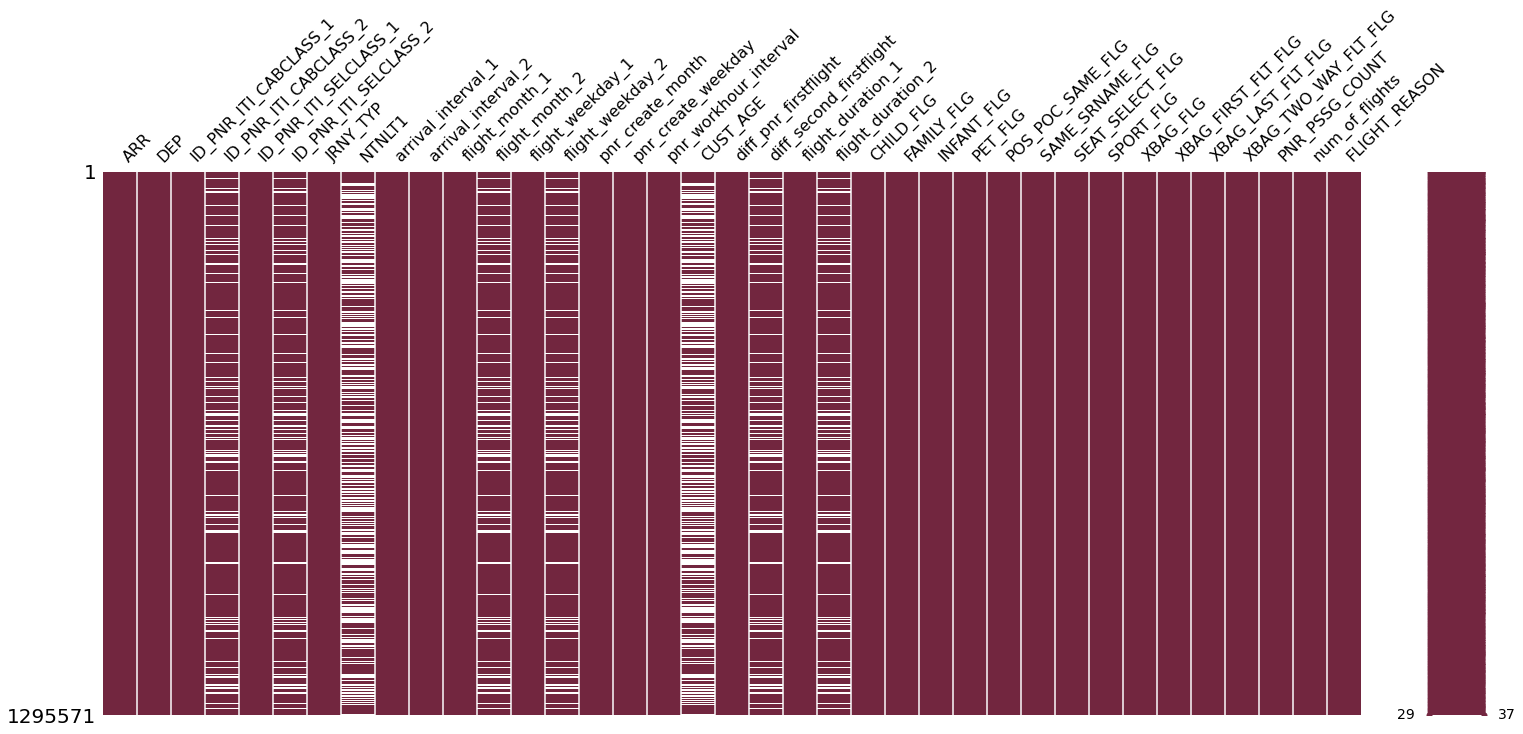

In [8]:
import missingno as msgn
#read in data here
msgn.matrix(merged_df,color=(0.45, 0.15, 0.25))

### drop duplicates

In [9]:
tmp_df = merged_df.copy()
tmp_df['values_nolabel']  = merged_df.drop(['FLIGHT_REASON'], axis=1).applymap(str).apply(' '.join, axis=1)
tmp_df['values_label']  = merged_df.applymap(str).apply(' '.join, axis=1)

In [10]:
no_label = tmp_df[tmp_df.duplicated(subset=['values_nolabel'])].index
with_label = tmp_df[tmp_df.duplicated(subset=['values_label'])].index

In [11]:
conflicts_indexes = merged_df.loc[list(set(no_label).difference(set(with_label)))].index
conflicts_indexes

Int64Index([1201984, 566526, 1110212, 1226264, 807898, 1247613, 1260318], dtype='int64')

In [12]:
all_conflict_indexes = []
for ind in conflicts_indexes:
    print(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']]['FLIGHT_REASON'])
    all_conflict_indexes.extend(list(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']].index))
    print('---')

898909      LEISURE
1201984    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
343385     LEISURE
566526    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
343581     BUSINESS
343703     BUSINESS
1110212     LEISURE
Name: FLIGHT_REASON, dtype: object
---
980116      LEISURE
1226264    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
638445     LEISURE
807898    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
357281         LEISURE
357282         LEISURE
1247613    SECOND HOME
Name: FLIGHT_REASON, dtype: object
---
868592      LEISURE
1260318    BUSINESS
Name: FLIGHT_REASON, dtype: object
---


In [13]:
merged_df.drop(conflicts_indexes, inplace=True)

In [14]:
merged_df.drop_duplicates(inplace=True)

In [15]:
merged_df.shape

(953652, 37)

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### correlation

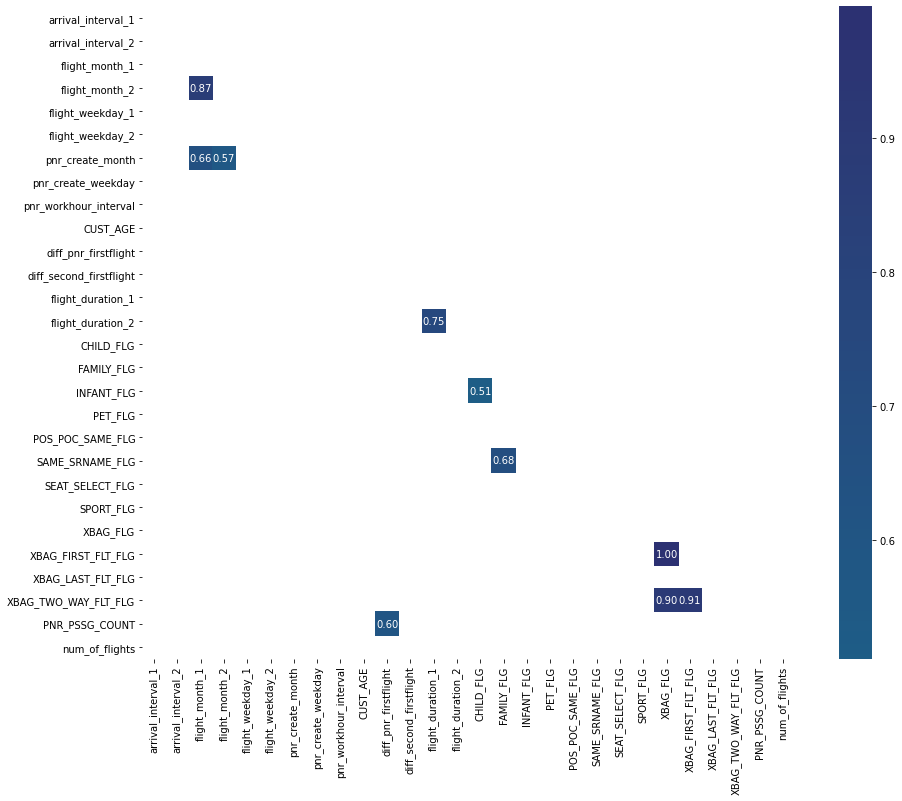

In [17]:
matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

In [18]:
# dropping 'XBAG_FLG' because high correlation
merged_df.drop(['XBAG_FLG'], axis=1, inplace=True)
passthrough.remove('XBAG_FLG')

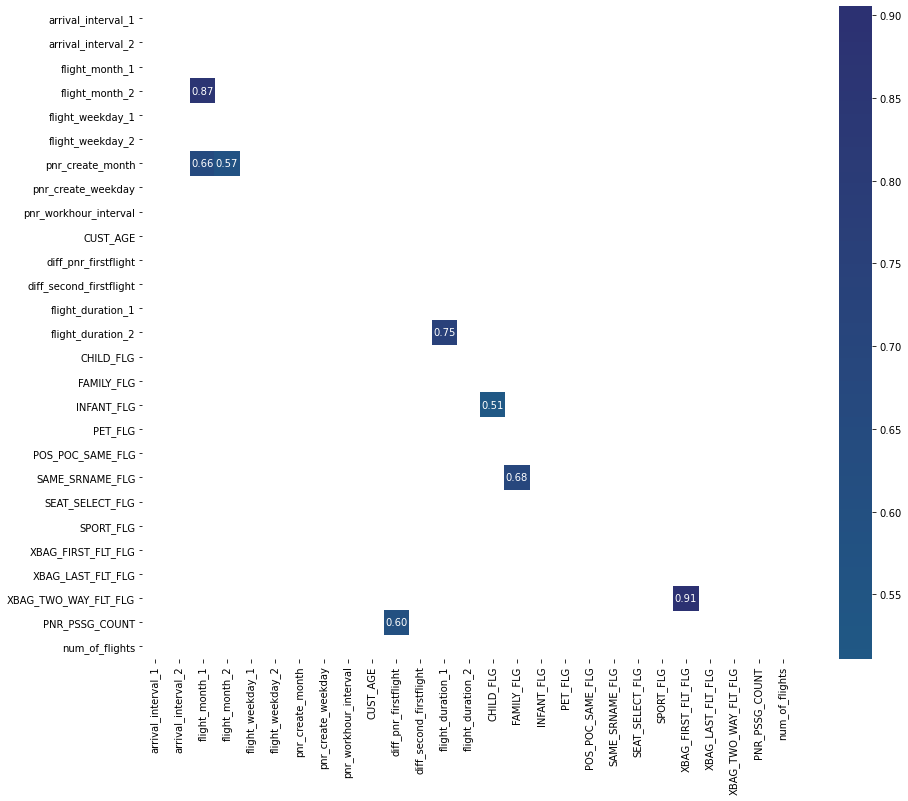

In [19]:
matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

In [20]:
merged_df.columns

Index(['ARR', 'DEP', 'ID_PNR_ITI_CABCLASS_1', 'ID_PNR_ITI_CABCLASS_2',
       'ID_PNR_ITI_SELCLASS_1', 'ID_PNR_ITI_SELCLASS_2', 'JRNY_TYP', 'NTNLT1',
       'arrival_interval_1', 'arrival_interval_2', 'flight_month_1',
       'flight_month_2', 'flight_weekday_1', 'flight_weekday_2',
       'pnr_create_month', 'pnr_create_weekday', 'pnr_workhour_interval',
       'CUST_AGE', 'diff_pnr_firstflight', 'diff_second_firstflight',
       'flight_duration_1', 'flight_duration_2', 'CHILD_FLG', 'FAMILY_FLG',
       'INFANT_FLG', 'PET_FLG', 'POS_POC_SAME_FLG', 'SAME_SRNAME_FLG',
       'SEAT_SELECT_FLG', 'SPORT_FLG', 'XBAG_FIRST_FLT_FLG',
       'XBAG_LAST_FLT_FLG', 'XBAG_TWO_WAY_FLT_FLG', 'PNR_PSSG_COUNT',
       'num_of_flights', 'FLIGHT_REASON'],
      dtype='object')

### visualizations

<AxesSubplot:xlabel='DEP', ylabel='Count'>

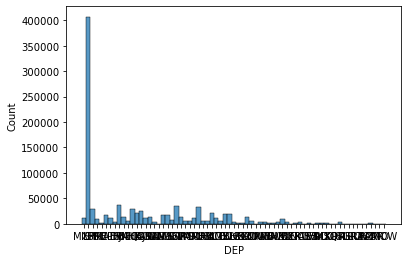

In [21]:
sns.histplot(data=merged_df, x="DEP", )

## eda for numerical features

In [22]:
import statsmodels.api as sm
import pylab as py

In [23]:
numerical

['CUST_AGE',
 'diff_pnr_firstflight',
 'diff_second_firstflight',
 'flight_duration_1',
 'flight_duration_2']

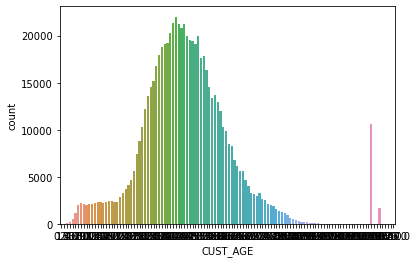

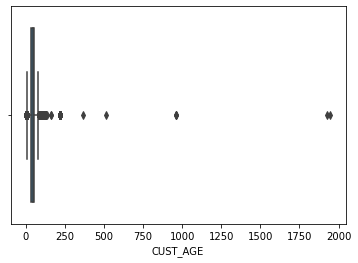

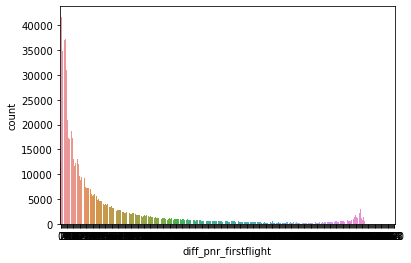

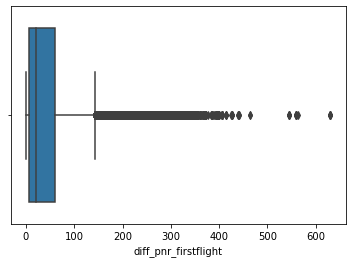

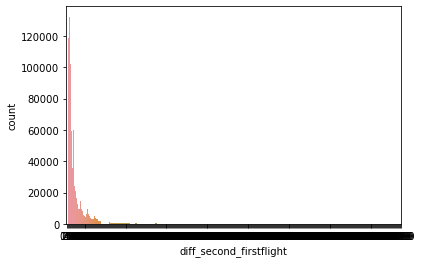

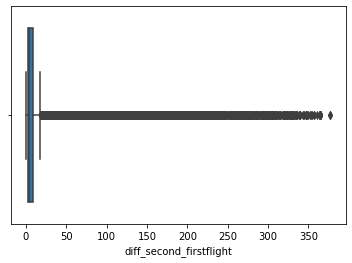

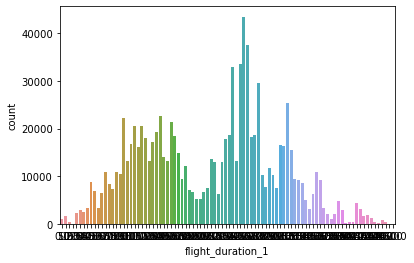

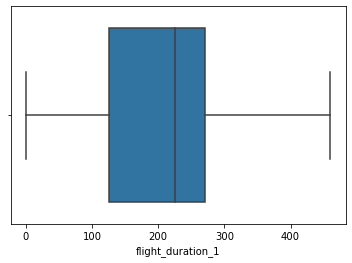

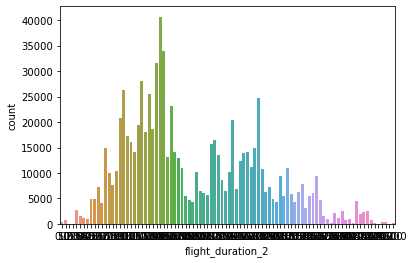

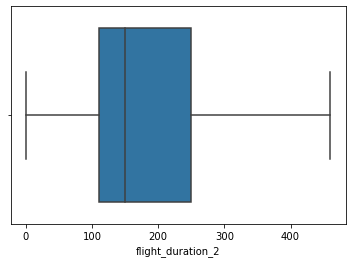

In [24]:
for i, col in enumerate(numerical):

    plt.figure(2*i)
    sns.countplot(x=col, data=merged_df)

    plt.figure(2*i+1)
    sns.boxplot(x=col, data=merged_df)


In [25]:
merged_df[merged_df['CUST_AGE']>120]['CUST_AGE']

14         121.0
56         121.0
130        121.0
258        221.0
569        121.0
           ...  
1293967    121.0
1294110    221.0
1294157    221.0
1294242    121.0
1295218    221.0
Name: CUST_AGE, Length: 12364, dtype: float64

In [26]:
merged_df[merged_df['diff_pnr_firstflight']>365]['diff_pnr_firstflight']

51830      405
51852      405
77749      396
123998     389
189386     559
          ... 
1212413    369
1212682    369
1221615    399
1221616    399
1248279    387
Name: diff_pnr_firstflight, Length: 125, dtype: int64

In [27]:
merged_df[merged_df['flight_duration_1']>400]['flight_duration_1']

2394       425.0
2781       420.0
2871       405.0
3428       410.0
3429       410.0
           ...  
1289388    415.0
1290932    410.0
1290952    405.0
1290955    405.0
1290971    425.0
Name: flight_duration_1, Length: 13823, dtype: float64

'CUST_AGE' : has some outliers like 121, 221, 367, 1947 etc. Rows that contain these outliers may be dropped, because there is plenty of data. We choose 120 as threshold because oldest living person in the world is 118. source(https://www.ntv.com.tr/dunya/guinnesse-gore-dunyanin-en-yasli-insani-kane-118-yasina-girdi,it-X28s4mkG3f5o3N-Zc5w)
'diff_pnr_firstflight': has values greater than 365. We choose 365 as threshold becasue when we try to buy a ticket, latest date we can buy is 365 days later.
'diff_second_firstflight': If we same logic for this feature, number of days between two flights cannot be greater than 365.
'flight_duration_1' : According tto graphs there is no outliers for flight durations.
'flight_duration_2' : According tto graphs there is no outliers for flight durations.

### eda for categorical variables

In [28]:
categorical_int

['arrival_interval_1',
 'arrival_interval_2',
 'flight_month_1',
 'flight_month_2',
 'flight_weekday_1',
 'flight_weekday_2',
 'pnr_create_month',
 'pnr_create_weekday',
 'pnr_workhour_interval']

array([[<AxesSubplot:title={'center':'arrival_interval_1'}>,
        <AxesSubplot:title={'center':'arrival_interval_2'}>,
        <AxesSubplot:title={'center':'flight_month_1'}>],
       [<AxesSubplot:title={'center':'flight_month_2'}>,
        <AxesSubplot:title={'center':'flight_weekday_1'}>,
        <AxesSubplot:title={'center':'flight_weekday_2'}>],
       [<AxesSubplot:title={'center':'pnr_create_month'}>,
        <AxesSubplot:title={'center':'pnr_create_weekday'}>,
        <AxesSubplot:title={'center':'pnr_workhour_interval'}>]],
      dtype=object)

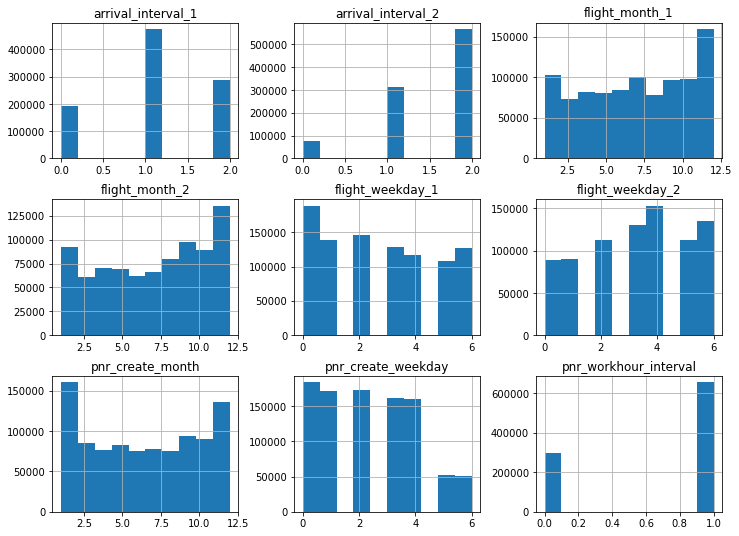

In [29]:
merged_df[categorical_int].hist(figsize=(12,9))

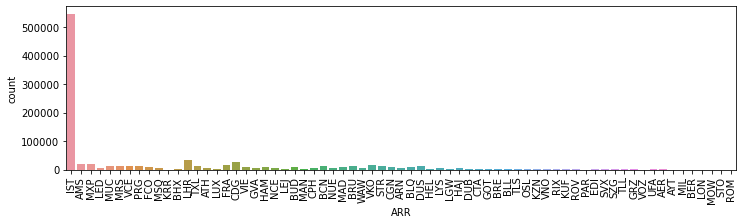

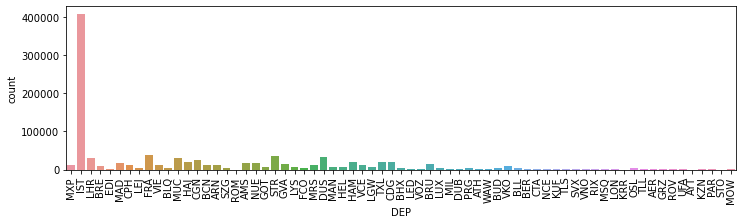

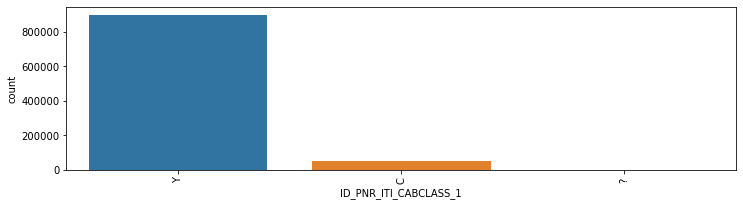

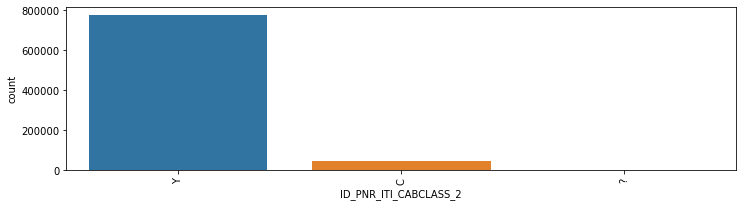

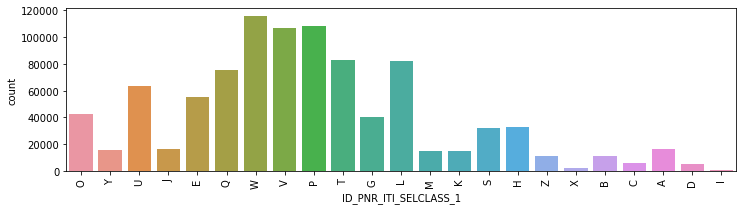

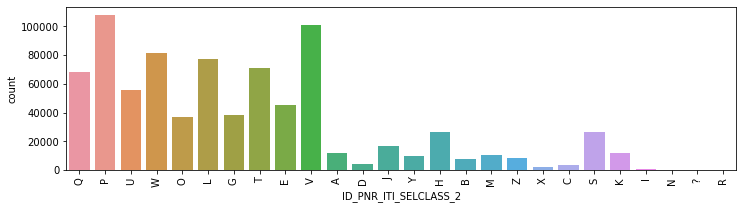

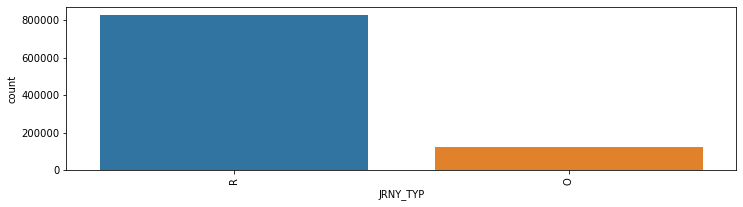

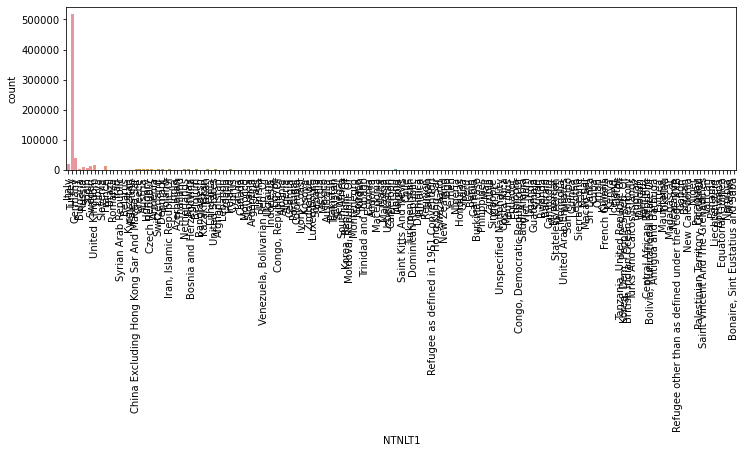

In [30]:
for i, col in enumerate(categorical_str):

    plt.figure(2*i, figsize=(12,3))
    ax = sns.countplot(x=col, data=merged_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Italy'),
 Text(1, 0, 'Turkey'),
 Text(2, 0, 'Germany'),
 Text(3, 0, 'Bulgaria'),
 Text(4, 0, 'Russia'),
 Text(5, 0, 'Spain'),
 Text(6, 0, 'Sweden'),
 Text(7, 0, 'United Kingdom'),
 Text(8, 0, 'Libya'),
 Text(9, 0, 'Slovenia'),
 Text(10, 0, 'France'),
 Text(11, 0, 'Brazil'),
 Text(12, 0, 'Romania'),
 Text(13, 0, 'Iraq'),
 Text(14, 0, 'Syrian Arab Republic'),
 Text(15, 0, 'Belarus'),
 Text(16, 0, 'Kyrgyzstan'),
 Text(17, 0, 'Palestine'),
 Text(18, 0, 'China Excluding Hong Kong Sar And Macao Sar'),
 Text(19, 0, 'Greece'),
 Text(20, 0, 'Austria'),
 Text(21, 0, 'Hungary'),
 Text(22, 0, 'Czech Republic'),
 Text(23, 0, 'Armenia'),
 Text(24, 0, 'Switzerland'),
 Text(25, 0, 'Denmark'),
 Text(26, 0, 'Poland'),
 Text(27, 0, 'Iran, Islamic Republic Of'),
 Text(28, 0, 'India'),
 Text(29, 0, 'Azerbaijan'),
 Text(30, 0, 'Thailand'),
 Text(31, 0, 'Netherlands'),
 Text(32, 0, 'Norway'),
 Text(33, 0, 'Bosnia and Herzegovina'),
 Text(34, 0, 'Belgium'),
 Text(35, 0, 'Bangladesh'),
 Text(36, 0

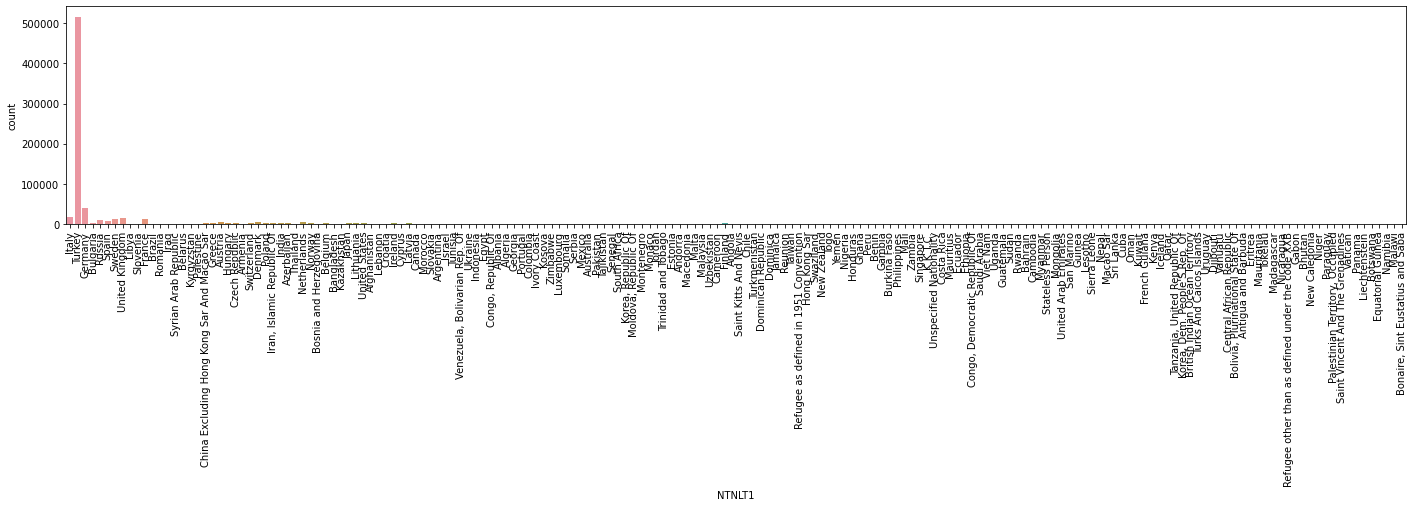

In [31]:
plt.figure(1, figsize=(24,4))
ax = sns.countplot(x='NTNLT1', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [32]:
merged_df['NTNLT1'].value_counts()[:10]

Turkey            516427
Germany            39042
Italy              17771
United Kingdom     14999
France             12911
Sweden             11247
Russia              9191
Spain               5923
Netherlands         4176
Austria             3684
Name: NTNLT1, dtype: int64

### arranging dataframe

In [33]:
# removing outliers
merged_df = merged_df[merged_df['CUST_AGE']<100]
merged_df = merged_df[merged_df['diff_pnr_firstflight']<365]
merged_df = merged_df[merged_df['diff_second_firstflight']<365]

In [34]:
merged_df.shape

(588615, 36)

In [35]:
merged_df['FLIGHT_REASON'].value_counts()

BUSINESS       259251
SECOND HOME    180461
LEISURE        148173
STUDENT           730
Name: FLIGHT_REASON, dtype: int64

## feature importance

In [ ]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

In [66]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

NameError: name 'model' is not defined

In [36]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
X.isna().sum()[X.isna().sum()>0]

NTNLT1    7634
dtype: int64

In [40]:
X[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588615 entries, 0 to 1295570
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CUST_AGE                 588615 non-null  float64
 1   diff_pnr_firstflight     588615 non-null  int64  
 2   diff_second_firstflight  588615 non-null  float64
 3   flight_duration_1        588615 non-null  float64
 4   flight_duration_2        588615 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 26.9 MB


In [41]:
merged_df['ID_PNR_ITI_SELCLASS_2'].unique() 

array(['Q', 'P', 'U', 'L', 'G', 'T', 'E', 'W', 'A', 'V', 'D', 'J', 'Y',
       'B', 'M', 'O', 'Z', 'X', 'C', 'S', 'H', 'K', 'I', 'N', '?'],
      dtype=object)

In [42]:
(X[numerical]==-1).index

Int64Index([      0,       1,       2,       4,      52,      70,      73,
                 74,      75,      78,
            ...
            1295465, 1295478, 1295479, 1295480, 1295481, 1295482, 1295483,
            1295540, 1295569, 1295570],
           dtype='int64', length=588615)

In [43]:
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [44]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [45]:
y.value_counts()

BUSINESS       259251
SECOND HOME    180461
LEISURE        148173
STUDENT           730
Name: FLIGHT_REASON, dtype: int64

## undersampling

#### equalizing sample sizes

In [67]:
num_sample = y[y=='STUDENT'].shape[0]
index_1 = y[y=='BUSINESS'].sample(num_sample).index
index_2 = y[y=='LEISURE'].sample(num_sample).index
index_3 = y[y=='SECOND HOME'].sample(num_sample).index
index_4 = y[y=='STUDENT'].index

In [68]:
all_indexes = list(index_1) + list(index_2) + list(index_3) + list(index_4)
len(all_indexes)

2920

In [69]:
X = X.loc[all_indexes]
y = y[all_indexes]

In [70]:
y.value_counts()

STUDENT        730
BUSINESS       730
SECOND HOME    730
LEISURE        730
Name: FLIGHT_REASON, dtype: int64

In [71]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [72]:
%%time
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight=cw, n_jobs=-1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

training score: 1.000
test score: 0.939
              precision    recall  f1-score   support

    BUSINESS       0.91      0.94      0.92       241
     LEISURE       0.93      0.88      0.91       241
 SECOND HOME       0.96      0.99      0.97       241
     STUDENT       0.95      0.94      0.95       241

    accuracy                           0.94       964
   macro avg       0.94      0.94      0.94       964
weighted avg       0.94      0.94      0.94       964

Wall time: 332 ms


In [82]:
clf['preprocessor'].transform(X_train).toarray()

array([[ 0.15133871, -0.66888644, -0.45545758, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.96560887, -0.24789993,  0.34672406, ...,  0.        ,
         2.        ,  2.        ],
       [ 1.46669819, -0.6207737 , -0.45545758, ...,  0.        ,
         2.        ,  2.        ],
       ...,
       [-0.72556761, -0.58468914,  0.20721421, ...,  0.        ,
         2.        ,  2.        ],
       [-0.97611227,  0.22119933, -0.2461928 , ...,  0.        ,
        16.        ,  2.        ],
       [-1.22665694, -0.68091463,  0.41647898, ...,  0.        ,
         1.        ,  2.        ]])

In [ ]:
clf['classifier'].pre

In [83]:
import shap
shap_values = shap.Explainer(clf['classifier']).shap_values(clf['preprocessor'].transform(X_train).toarray())
shap.summary_plot(shap_values, X_train, plot_type="bar")

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

#### using different sample sizes based on f1-scores

In [84]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [85]:
num_sample = y[y=='STUDENT'].shape[0]
index_1 = y[y=='BUSINESS'].sample(2*num_sample).index
index_2 = y[y=='LEISURE'].sample(3*num_sample).index
index_3 = y[y=='SECOND HOME'].sample(2*num_sample).index
index_4 = y[y=='STUDENT'].index

In [86]:
all_indexes = list(index_1) + list(index_2) + list(index_3) + list(index_4)
len(all_indexes)

5840

In [87]:
X = X.loc[all_indexes]
y = y[all_indexes]

In [88]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [89]:
y.value_counts()

LEISURE        2190
SECOND HOME    1460
BUSINESS       1460
STUDENT         730
Name: FLIGHT_REASON, dtype: int64

In [90]:
%%time
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight=cw, n_jobs=-1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

training score: 1.000
test score: 0.947
              precision    recall  f1-score   support

    BUSINESS       0.94      0.93      0.93       482
     LEISURE       0.94      0.94      0.94       723
 SECOND HOME       0.95      1.00      0.97       482
     STUDENT       0.97      0.91      0.94       241

    accuracy                           0.95      1928
   macro avg       0.95      0.94      0.95      1928
weighted avg       0.95      0.95      0.95      1928

Wall time: 416 ms


In [59]:
ss_

NameError: name 'ss_' is not defined

## smote

In [ ]:
y = merged_df['FLIGHT_REASON']
X = merged_df[categorical_str+categorical_int+numerical+passthrough]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from imblearn.over_sampling import SMOTENC

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
smote = SMOTENC(random_state=42, categorical_features=range(5,X_train.shape[1]), 
                                              sampling_strategy='minority', n_jobs=-1)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
cw = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [ ]:
clf = RandomForestClassifier(class_weight=cw, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("training score: %.3f" % clf.score(X_train, y_train))
print("test score: %.3f" % clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
feature importance - shap
auto ml

In [103]:
def create_pipeline(clf_name, clf_object):
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_str_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    categorical_int_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num', numeric_transformer, numerical),
                                                  ('cat_str', categorical_str_transformer, categorical_str),
                                                  ('cat_int', categorical_int_transformer, categorical_int),], 
                                    n_jobs = -1,
                                    transformer_weights = None,
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          (clf_name, clf_object)],
                            verbose=False)
    return pipeline

In [107]:
import xgboost
import lightgbm
import sklearn
import time
from tqdm import tqdm
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
from sklearn.metrics import average_precision_score, accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score

In [105]:
CLASSIFIERS = [est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
removed_classifiers = [
    ("CheckingClassifier", sklearn.utils._mocking.CheckingClassifier),
    ("ClassifierChain", sklearn.multioutput.ClassifierChain),
    ("ComplementNB", sklearn.naive_bayes.ComplementNB),
    ("GradientBoostingClassifier", sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,),
    ("GaussianProcessClassifier", sklearn.gaussian_process.gpc.GaussianProcessClassifier,),
    ("HistGradientBoostingClassifier", sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,),
    ("MLPClassifier", sklearn.neural_network.multilayer_perceptron.MLPClassifier),
    ("LogisticRegressionCV", sklearn.linear_model.logistic.LogisticRegressionCV),
    ("MultiOutputClassifier", sklearn.multioutput.MultiOutputClassifier),
    ("MultinomialNB", sklearn.naive_bayes.MultinomialNB),
    ("OneVsOneClassifier", sklearn.multiclass.OneVsOneClassifier),
    ("OneVsRestClassifier", sklearn.multiclass.OneVsRestClassifier),
    ("OutputCodeClassifier", sklearn.multiclass.OutputCodeClassifier),
    ("RadiusNeighborsClassifier", sklearn.neighbors.classification.RadiusNeighborsClassifier,),
    ("VotingClassifier", sklearn.ensemble.voting.VotingClassifier),
]

for i in removed_classifiers:
    CLASSIFIERS.pop(CLASSIFIERS.index(i))
    
CLASSIFIERS.append(("XGBClassifier", xgboost.XGBClassifier))
CLASSIFIERS.append(("LGBMClassifier", lightgbm.LGBMClassifier))

In [108]:
random_state = 10
Accuracy = []
B_Accuracy = []
ROC_AUC = []
F1 = []
names = []
TIME = []
predictions = {}
models = {}

for name, model in tqdm(CLASSIFIERS):
    start = time.time()
    try:
        if "random_state" in model().get_params().keys():
            if "class_weight" in model().get_params().keys():
                pipe = create_pipeline("classifier", model(random_state=random_state, class_weight=cw))
            else:
                pipe = create_pipeline("classifier", model(random_state=random_state))
        else:
            if "class_weight" in model().get_params().keys():
                pipe = create_pipeline("classifier", model(class_weight=cw))
            else:
                pipe = create_pipeline("classifier", model())
                
                                   
        pipe.fit(X_train, y_train)
        models[name] = pipe
        y_pred = pipe.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred, normalize=True)
        b_accuracy = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        
        try:
            roc_auc = roc_auc_score(y_test, y_pred)
        except Exception as exception:
            roc_auc = None
                                   
        names.append(name)
        Accuracy.append(accuracy)
        B_Accuracy.append(b_accuracy)
        ROC_AUC.append(roc_auc)
        F1.append(f1)
        TIME.append(time.time() - start)
    
    except Exception as exception:
        print(name + " model failed to execute")
        print(exception)
                                   
scores = pd.DataFrame(
    {   "Model": names,
        "Accuracy": Accuracy,
        "Balanced Accuracy": B_Accuracy,
        "ROC AUC": ROC_AUC,
        "F1 Score": F1,
        "Time Taken": TIME, })      

  7%|█████▋                                                                             | 2/29 [00:01<00:14,  1.83it/s]Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
 21%|█████████████████▏                                                                 | 6/29 [00:02<00:07,  3.21it/s]

CategoricalNB model failed to execute
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


 31%|█████████████████████████▊                                                         | 9/29 [00:03<00:10,  1.89it/s]

GaussianNB model failed to execute
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


 38%|███████████████████████████████                                                   | 11/29 [00:04<00:07,  2.52it/s]

LabelPropagation model failed to execute
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
LabelSpreading model failed to execute
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
LinearDiscriminantAnalysis model failed to execute
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


Liblinear failed to converge, increase the number of iterations.
 52%|██████████████████████████████████████████▍                                       | 15/29 [00:04<00:03,  4.27it/s]lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:07<00:03,  2.58it/s]

QuadraticDiscriminantAnalysis model failed to execute
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:10<00:01,  2.26it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:11<00:00,  2.59it/s]


In [111]:
scores.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
20,XGBClassifier,0.949170,0.951245,None,0.949030,0.403990
21,LGBMClassifier,0.948651,0.952282,None,0.948475,0.596985
15,RandomForestClassifier,0.947095,0.941909,None,0.946837,1.260968
1,BaggingClassifier,0.938797,0.937068,None,0.938660,0.630984
7,ExtraTreesClassifier,0.933091,0.913036,None,0.932084,1.635961
4,DecisionTreeClassifier,0.922718,0.926003,None,0.922746,0.131996
10,LogisticRegression,0.917012,0.926349,None,0.916745,0.221996
3,CalibratedClassifierCV,0.914938,0.914419,None,0.914739,0.945975
9,LinearSVC,0.910270,0.914592,None,0.910052,0.276992
18,SGDClassifier,0.906639,0.907676,None,0.906301,0.094998


In [ ]:
fdazxdgxf

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
stopp

In [ ]:
without class weights:
              precision    recall  f1-score   support

    BUSINESS       0.97      0.99      0.98    151336
     LEISURE       0.98      0.97      0.97    190324
 SECOND HOME       0.98      0.97      0.98     85474
     STUDENT       0.99      0.42      0.59       405

    accuracy                           0.98    427539
   macro avg       0.98      0.84      0.88    427539
weighted avg       0.98      0.98      0.98    427539

In [ ]:
merged_df.diff_pnr_firstflight

In [ ]:
new features
if we can use additional datasets
is NTNLT1 in arr or dep of oene of the flights 

In [ ]:
is it possible to flight before pnr

pnrs[pnrs['diff_pnr_firstflight']<0][['ID_PNR_ITI_DEP_YMD_1', 'ID_PNR_CREATION_DTIME_GMT', 'diff_pnr_firstflight']]

2. uçuşun 1. uçuştan önce olması mümkün mü?
pnrs[pnrs['diff_second_firstflight']==2][['ID_PNR_ITI_DEP_YMD_2', 'ID_PNR_ITI_DEP_YMD_1', 'diff_second_firstflight']]
